In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow


In [ ]:
pip install keras


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of images: (18380, 64, 64, 3)
Shape of labels: (18380,)
Epoch 1/25
460/460 [==============================] - 130s 279ms/step - loss: 1.2184 - accuracy: 0.5116 - val_loss: 1.2297 - val_accuracy: 0.5005
Epoch 2/25
460/460 [==============================] - 124s 269ms/step - loss: 1.1180 - accuracy: 0.5544 - val_loss: 1.0458 - val_accuracy: 0.5783
Epoch 3/25
460/460 [==============================] - 129s 281ms/step - loss: 1.0704 - accuracy: 0.5732 - val_loss: 1.0417 - val_accuracy: 0.5789
Epoch 4/25
460/460 [==============================] - 128s 279ms/step - loss: 1.0443 - accuracy: 0.5796 - val_loss: 1.0034 - val_accuracy: 0.5936
Epoch 5/25
460/460 [==============================] - 129s 280ms/step - loss: 1.0257 - accuracy: 0.5889 - val_loss: 0.9878 - val_accuracy: 0.6009
Epoch 6/25
460/460 [==============================] - 124s 269ms/step - loss: 1

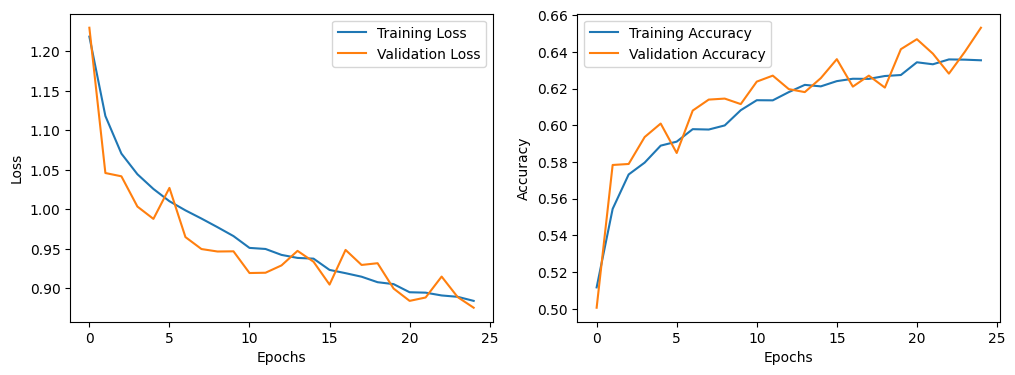

Model saved in /content/drive/My Drive/your_model_folder/ as 'age_group_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import nibabel as nib

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from google.colab import files
import os
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

#uploaded = files.upload()
drive.mount('/content/drive')
models='/content/drive/My Drive/drive/ocular_images.npy'
cascade='/content/drive/My Drive/drive/age_labels.npy'

# Load and preprocess the dataset
# Ensure you have the 'ocular_images.npy' and 'age_labels.npy' files ready
images = np.load(models)  # Load images
labels = np.load(cascade)     # Load labels

# Print shapes to check if the arrays were loaded correctly
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)


# Normalize the images
images = images / 255.0


# Encode the labels into one-hot vectors
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the model
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], images.shape[3])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(lb.classes_), activation='softmax')])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Train the model
batch_size = 32
epochs = 25

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    epochs=epochs
)




# Evaluate the model

loss, accuracy = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Validation loss: {loss * 100:.2f}%, Validation accuracy: {accuracy * 100:.2f}%")
print(f"Validation precision: {precision*100:.2f}, Validation recall: {recall*100:.2f}, Validation F1 score: {f1*100:.2f}")
#print(f'Test precision: {precision}')
#print(f'Test recall: {recall}')
#print(f'Test f1score: {f1score}')
# Save the model
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model_folder = '/content/drive/My Drive/your_model_folder/'

# Save the model
model.save(os.path.join(model_folder, 'age_group_model.h5'))
print(f"Model saved in {model_folder} as 'age_group_model.h5'")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 92ms/step


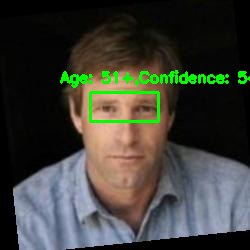

Invalid ocular region
Eyes not detected
Invalid ocular region
1/1 [==============================] - 0s 25ms/step


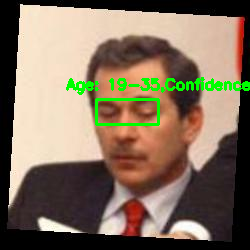

1/1 [==============================] - 0s 23ms/step


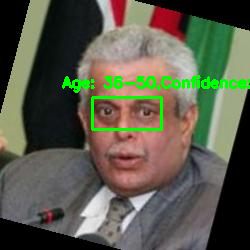

1/1 [==============================] - 0s 23ms/step


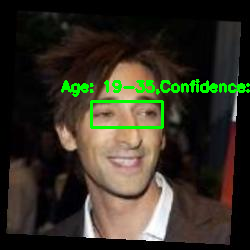

1/1 [==============================] - 0s 23ms/step


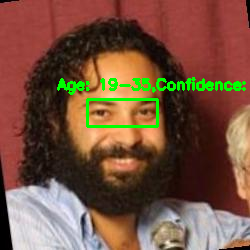

1/1 [==============================] - 0s 33ms/step


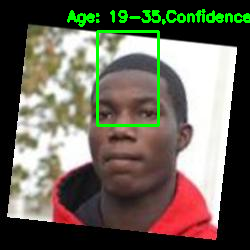

Invalid ocular region
Invalid ocular region
Eyes not detected
Invalid ocular region
Eyes not detected
1/1 [==============================] - 0s 23ms/step


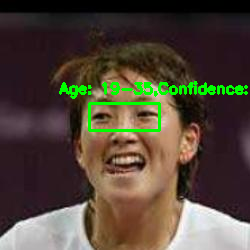

Eyes not detected
Invalid ocular region
1/1 [==============================] - 0s 24ms/step


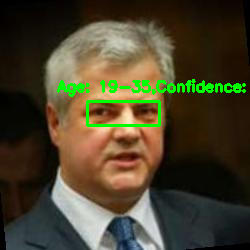

Invalid ocular region
1/1 [==============================] - 0s 46ms/step


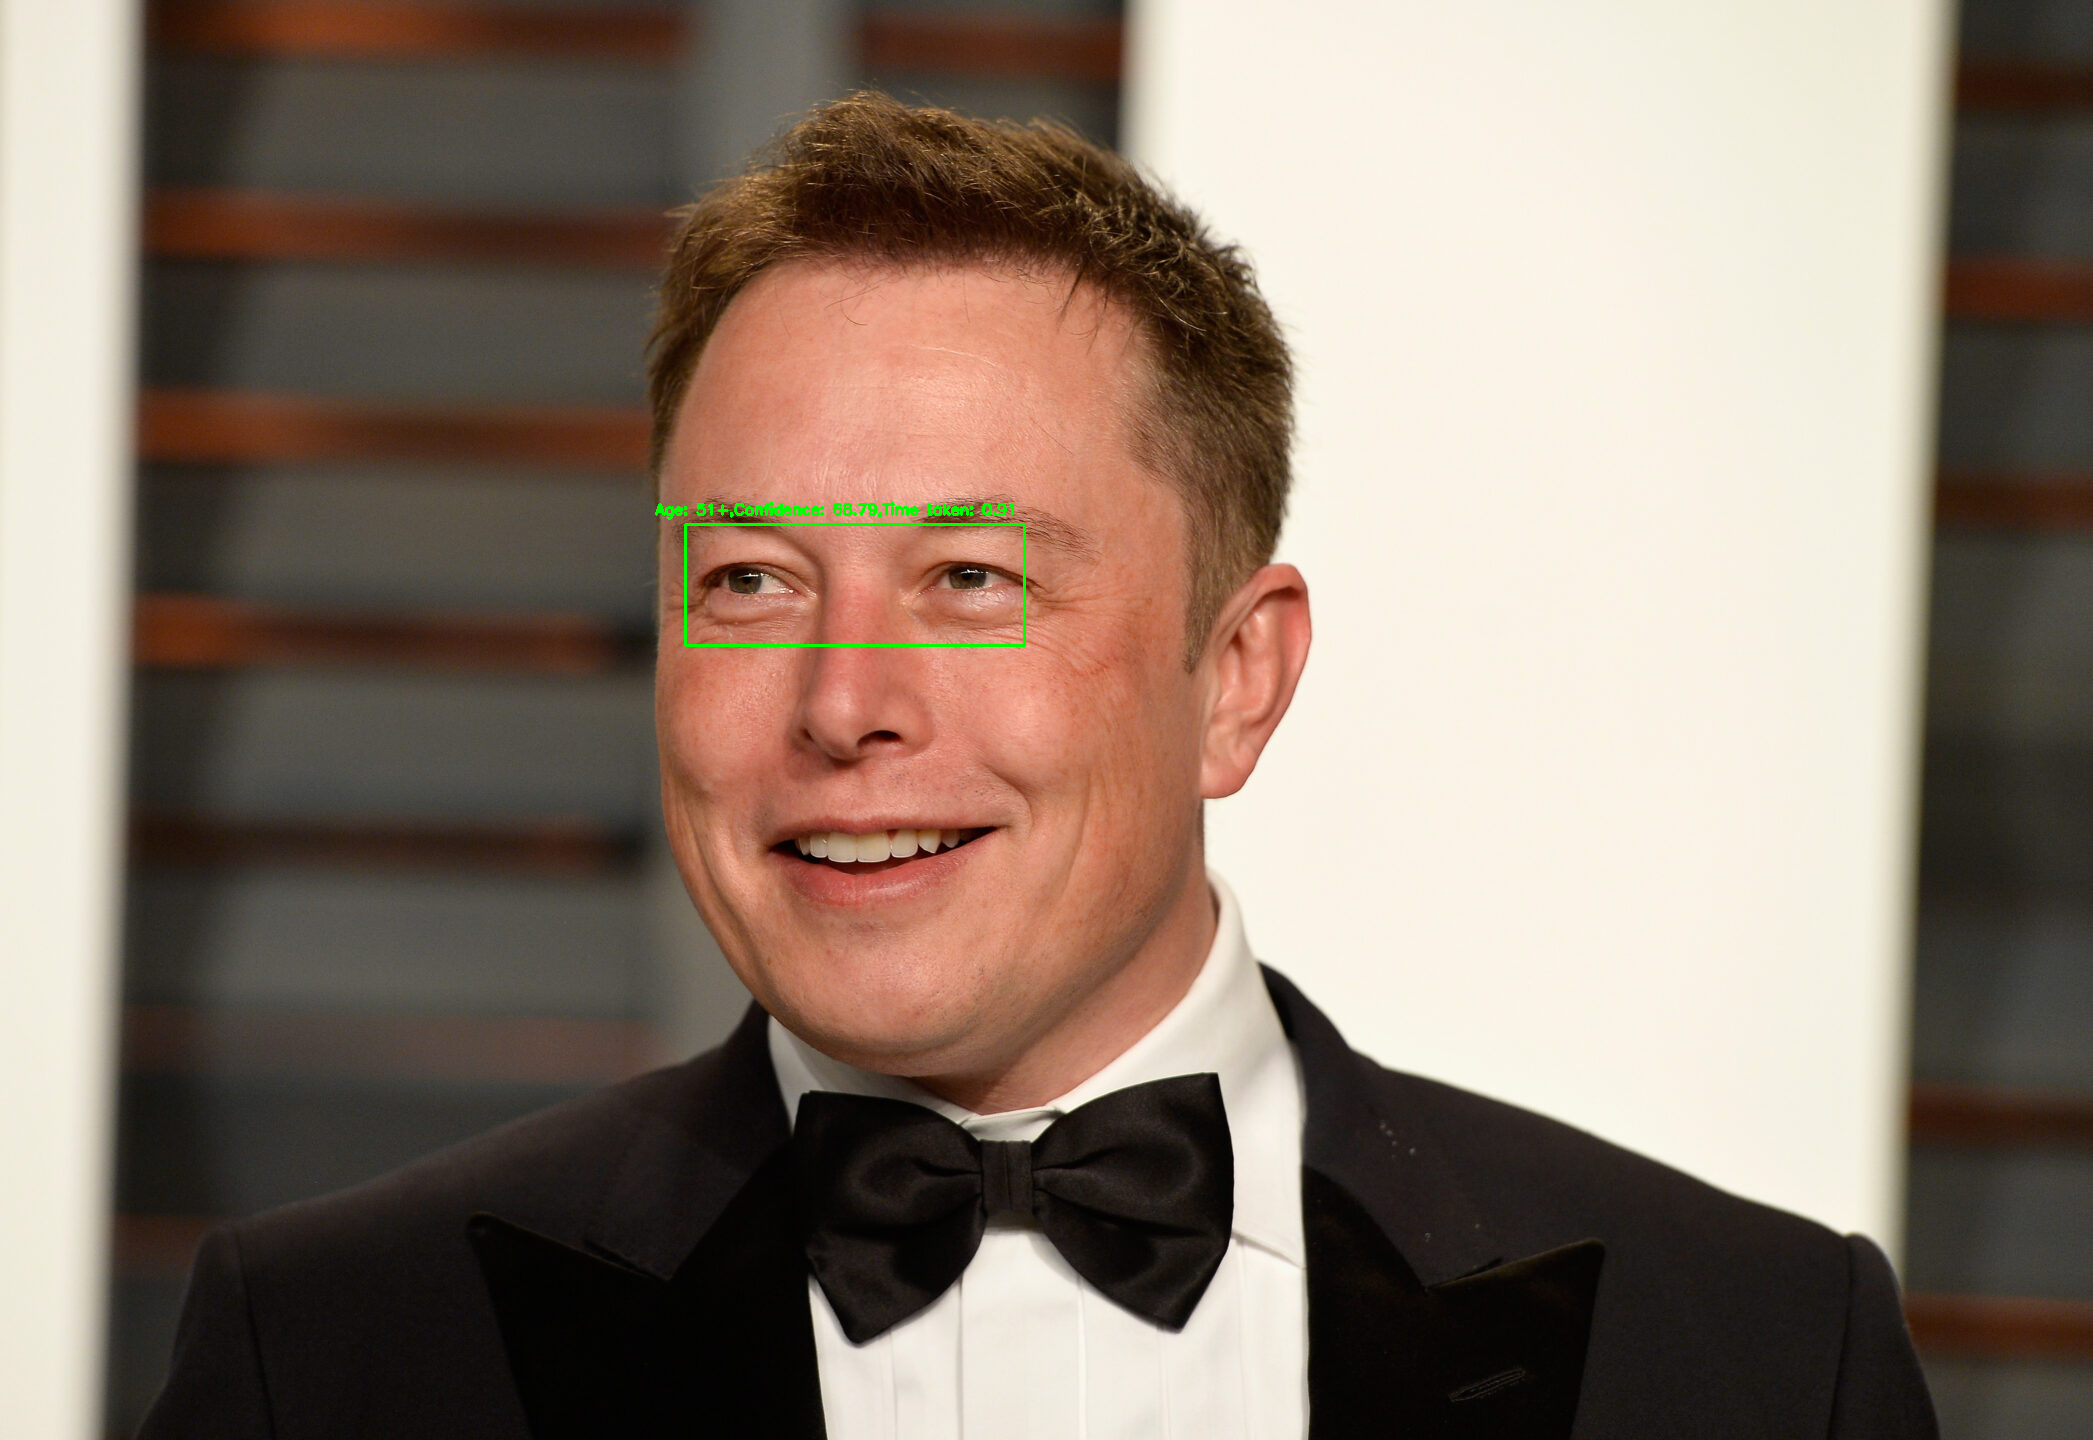

1/1 [==============================] - 0s 68ms/step


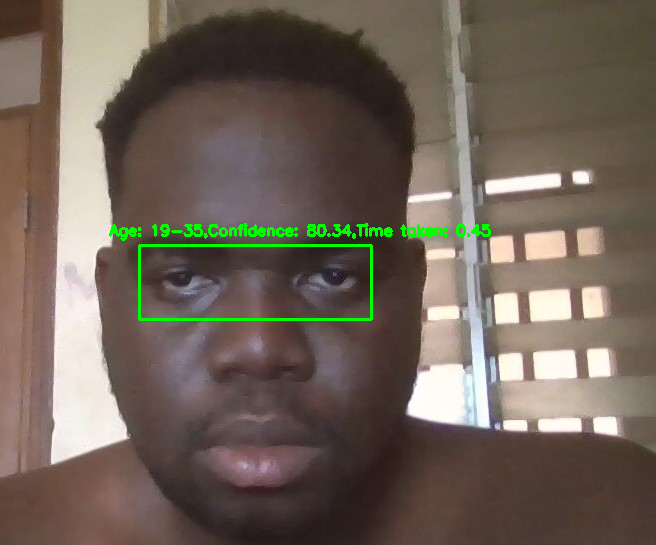

Invalid ocular region
1/1 [==============================] - 0s 72ms/step


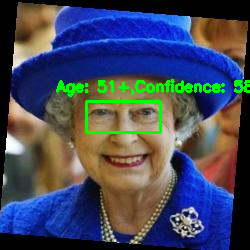

Predictions saved to /content/drive/My Drive/your_model_folder/age_predictions.csv
Time taken: 8.075019598007202


In [ ]:
import cv2
import numpy as np
import os
from keras.models import load_model
from datetime import datetime
import time
import csv
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')
models='/content/drive/My Drive/your_model_folder/age_group_model.h5'
cascade='/content/drive/My Drive/your_model_folder/haarcascade_eye.xml'
# Load the pre-trained age group model
age_model = load_model(models)

# Create a CSV file to store predictions
csv_filename = '/content/drive/My Drive/your_model_folder/age_predictions.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Filename', 'Predicted Age Group', 'Confidence Score', 'Recognition speed','Date', 'Total time taken'])

# Get the current date and time
now = datetime.now()

# Format it as "dd-mm-yyyy hh:mm:ss"
formatted_date = now.strftime("%d-%m-%Y")

starting_time = time.time()


def detect_age_using_eyes(image_path):
    starting_time = time.time()
    # Load the image
    image = cv2.imread(image_path)

    # Detect eyes using Haar cascades (you can replace this with your eye detection method)
    eye_cascade = cv2.CascadeClassifier(cascade)
    eyes = eye_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)  # Detect eyes on the color image

    if len(eyes) >= 2:
        x1, y1, w1, h1 = eyes[0]
        x2, y2, w2, h2 = eyes[1]
        ocular_region = image[y1:y1 + h1, x1:x2 + w2]  # Extract ocular region from color image

          # Check if the ocular region is valid (non-empty)
        if ocular_region.size == 0:
            return "Invalid ocular region"

        # Preprocess the ocular region
        ocular_region = cv2.resize(ocular_region, (64, 64)) / 255.0
        ocular_region = np.expand_dims(ocular_region, axis=0)  # Add batch dimension

        # Predict the age group
        age_group_probs = age_model.predict(ocular_region)
        age_group_index = np.argmax(age_group_probs)
        age_groups = ["0-18", "19-35", "36-50", "51+"]
        predicted_age_group = age_groups[age_group_index]
         # Get the confidence score (probability)
        confidence_score = age_group_probs[0, age_group_index]

        # Draw rectangles around the detected eyes
        cv2.rectangle(image, (x1, y1), (x2 + w2, y2 + h2), (0, 255, 0), 2)

        elapsed_time = time.time() - starting_time
        #(f' Time taken: { elapsed_time:.2f} , Confidence: {confidence_score:.2f}, Age: {predicted_age_group}', image)
        # Display the predicted age group and confidence score
        cv2.putText(image, f"Age: {predicted_age_group},Confidence: {confidence_score*100:.2f},Time taken: { elapsed_time:.2f}  ", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        middletime = now.strftime("%H:%M:%S")
        with open(csv_filename, 'a', newline='') as csvfile:
          writer = csv.writer(csvfile)
          writer.writerow([filename, predicted_age_group, confidence_score, elapsed_time, formatted_date, middletime])
        return image
    else:
        return "Eyes not detected"



# Specify the path to your uploaded files on Google Drive
google_drive_path = '/content/drive/My Drive/jube test images/'

# List files in the specified folder
for filename in os.listdir(google_drive_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(google_drive_path, filename)
        result_image = detect_age_using_eyes(image_path)
        if isinstance(result_image, str):
            print(result_image)
        else:
            cv2_imshow( result_image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
print(f"Predictions saved to {csv_filename}")